In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='benvacek', api_key='hdJj4MRyb6oNYJYnG7pI')

In [53]:
rcp_df = pd.read_csv('rcp.csv')
rcp_df.head()

,date,title,source,author,link
0,2018/12/11,"Republicans, Don't Break Our Democracy",CNN,Tom Perez,https://www.realclearpolitics.com/2018/12/11/r...
1,2018/12/11,Build the Wall--Do What We Said We'd Do,FOX News,Reps. Jordan,https://www.realclearpolitics.com/2018/12/11/b...
2,2018/12/11,Why Democrats Need Nancy Pelosi as Speaker,USA Today,Jill Lawrence,https://www.realclearpolitics.com/2018/12/11/w...
3,2018/12/11,Will the Leakers in the Flynn Case Escape Just...,American Greatness,Julie Kelly,https://www.realclearpolitics.com/2018/12/11/w...
4,2018/12/11,What Has the President Been 'Smocking'?,Washington Post,Eugene Robinson,https://www.realclearpolitics.com/2018/12/11/w...


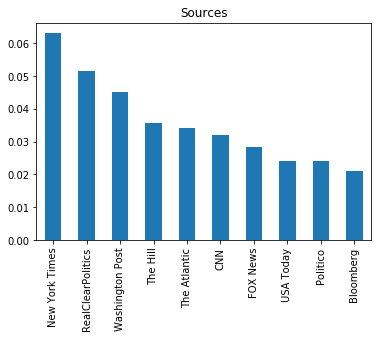

In [54]:
rcp_df['source'].value_counts(normalize=True).head(10).plot.bar()
plt.title('Sources')
plt.show()

In [55]:
top10sources = list(rcp_df['source'].value_counts().head(10).keys())
top10sources

['New York Times',
 'RealClearPolitics',
 'Washington Post',
 'The Hill',
 'The Atlantic',
 'CNN',
 'FOX News',
 'USA Today',
 'Politico',
 'Bloomberg']

In [56]:
rcp_df.insert(1,'month',None)
rcp_df.insert(2,'day',None)
rcp_df.insert(3,'year',None)
rcp_df.head()

,date,month,day,year,title,source,author,link
0,2018/12/11,None,None,None,"Republicans, Don't Break Our Democracy",CNN,Tom Perez,https://www.realclearpolitics.com/2018/12/11/r...
1,2018/12/11,None,None,None,Build the Wall--Do What We Said We'd Do,FOX News,Reps. Jordan,https://www.realclearpolitics.com/2018/12/11/b...
2,2018/12/11,None,None,None,Why Democrats Need Nancy Pelosi as Speaker,USA Today,Jill Lawrence,https://www.realclearpolitics.com/2018/12/11/w...
3,2018/12/11,None,None,None,Will the Leakers in the Flynn Case Escape Just...,American Greatness,Julie Kelly,https://www.realclearpolitics.com/2018/12/11/w...
4,2018/12/11,None,None,None,What Has the President Been 'Smocking'?,Washington Post,Eugene Robinson,https://www.realclearpolitics.com/2018/12/11/w...


In [57]:
for count,i in enumerate(rcp_df['date']):
    rcp_df['month'][count] = int(i.split('/')[1])
    rcp_df['day'][count] = int(i.split('/')[2])
    rcp_df['year'][count] = int(i.split('/')[0])

rcp_df.sample(10)

,date,month,day,year,title,source,author,link
9214,2018/01/06,1,6,2018,The Iranian Rebellion the World Wants to Ignore,The Spectator,Douglas Murray,https://www.realclearpolitics.com/2018/01/06/t...
5812,2018/05/11,5,11,2018,Trump Is Keeping His Campaign Promises,New York Post,Rich Lowry,https://www.realclearpolitics.com/2018/05/11/t...
5766,2018/05/13,5,13,2018,"In 2020, a Chance for Dems to Redefine the Left",Washington Post,Michael Scherer,https://www.realclearpolitics.com/2018/05/13/i...
6582,2018/04/13,4,13,2018,Pompeo Could Enable Trump's Worst Instincts,Slate,Fred Kaplan,https://www.realclearpolitics.com/2018/04/13/p...
433,2018/11/25,11,25,2018,Republicans Cannot Win Without Cheating,Sacramento Bee,Leonard Pitts,https://www.realclearpolitics.com/2018/11/25/r...
1890,2018/10/02,10,2,2018,A Trumped-Up New Trade Deal,The Daily Beast,David Rothkopf,https://www.realclearpolitics.com/2018/10/02/a...
6401,2018/04/20,4,20,2018,How to Prepare a Post-Trump Renaissance in Dip...,NY Times,Nicholas Kralev,https://www.realclearpolitics.com/2018/04/20/h...
6532,2018/04/15,4,15,2018,Michael Cohen & the End Stage of Trump's Presi...,New Yorker,Adam Davidson,https://www.realclearpolitics.com/2018/04/15/m...
690,2018/11/14,11,14,2018,Women Are Winning in the Trump Era,RealClearPolitics,Erin Montgomery,https://www.realclearpolitics.com/2018/11/14/w...
659,2018/11/15,11,15,2018,What Trump Can Learn From History,Washington Times,Monica Crowley,https://www.realclearpolitics.com/2018/11/15/w...


In [110]:
temp_df = pd.concat([rcp_df[rcp_df['source'].isin(top10sources)]['source'],
                     rcp_df[rcp_df['source'].isin(top10sources)]['month']],
                    axis = 1)
data = {}

for i in list(temp_df['source'].unique()):
    arr = []
    for j in list(temp_df['month'].unique()):
        arr.append(temp_df[(temp_df['source'] == i) & (temp_df['month'] == j)].size)
    data[i] = arr
data

{'Bloomberg': [18, 30, 26, 28, 44, 24, 32, 28, 36, 48, 30, 34],
 'CNN': [16, 42, 48, 40, 54, 50, 48, 58, 42, 68, 46, 68],
 'FOX News': [32, 60, 48, 40, 58, 58, 52, 42, 42, 28, 24, 30],
 'New York Times': [44, 80, 118, 116, 108, 88, 102, 86, 100, 88, 94, 114],
 'Politico': [10, 48, 28, 32, 24, 30, 44, 40, 42, 42, 46, 46],
 'RealClearPolitics': [28, 120, 96, 60, 94, 98, 80, 72, 66, 88, 62, 66],
 'The Atlantic': [18, 60, 58, 58, 54, 50, 54, 60, 58, 54, 48, 44],
 'The Hill': [12, 52, 60, 56, 76, 74, 52, 78, 44, 62, 44, 32],
 'USA Today': [20, 36, 44, 56, 28, 58, 36, 40, 32, 32, 22, 30],
 'Washington Post': [22, 70, 70, 74, 72, 68, 70, 78, 62, 62, 76, 88]}

In [118]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

trace0 = go.Scatter(
    x = month,
    y = data['Bloomberg'],
    name = 'Bloomberg'
)

trace1 = go.Scatter(
    x = month,
    y = data['CNN'],
    name = 'CNN'
)

trace2 = go.Scatter(
    x = month,
    y = data['FOX News'],
    name = 'FOX News'
)

trace3 = go.Scatter(
    x = month,
    y = data['New York Times'],
    name = 'New York Times'
)

trace4 = go.Scatter(
    x = month,
    y = data['Politico'],
    name = 'Politico'
)

trace5 = go.Scatter(
    x = month,
    y = data['RealClearPolitics'],
    name = 'RealClearPolitics'
)

trace6 = go.Scatter(
    x = month,
    y = data['The Atlantic'],
    name = 'The Atlantic'
)

trace7 = go.Scatter(
    x = month,
    y = data['The Hill'],
    name = 'The Hill'
)

trace8 = go.Scatter(
    x = month,
    y = data['USA Today'],
    name = 'USA Today'
)

trace9 = go.Scatter(
    x = month,
    y = data['Washington Post'],
    name = 'Washington Post'
)

py.iplot([trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9])